# Set up Log Analytics

You will need to set up the Notebook to use the KqlMagic package to connect to LogAnalytics. I click on the Add Packages button top right and search and install or you can

In [ ]:
import sys
!{sys.executable} -m pip install Kqlmagic --no-cache-dir --upgrade

and check it is installed

In [ ]:
import sys
!{sys.executable} -m pip list

Then set the extension to open the web browser

In [4]:
%config Kqlmagic.popup_interaction='webbrowser_open_at_kernel'

Then load the extension into the Notebook


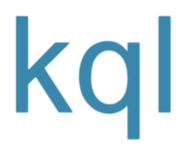

In [5]:
%reload_ext Kqlmagic

You can find help

In [ ]:
%kql --help "help" -popup_window

In [ ]:
%kql --help "LogAnalytics"

## Make a connection to Log Analytics

You will need your

- tenantid - place in `<tenantid>`
- clientid of the App with permissions - place in `<clientid>`
- Client secret for above - place in `<clientsecret>`
- Log Analytics WorkSpace ID- place in `<workspaceid>`
- custom name - place in `<alias>`

`%kql loganalytics://tenant='<tenantid>';clientid='<clientid>';clientsecret='<clientsecret>';workspace='<workspaceid>';alias='<alias>'`

In [6]:
%kql loganalytics://tenant='<tenantid>';clientid='<clientid>';clientsecret='<clientsecret>';workspace='<workspaceid>';alias='<alias>'

## Query the logs

Now you can run Kusto Queries against the logs

### Show me Failed Logins



In [20]:
%kql sqlManagedInstances_logs_CL | where Message startswith "Logon       Login "| sort by es_process_timestamp_t desc |project node=kubernetes_node_name_s,namespace=kubernetes_namespace_s,pod=kubernetes_pod_name_s,container=kubernetes_container_name_s,["message time"]=es_process_timestamp_t,Message

<IPython.core.display.Javascript object>

node,namespace,pod,container,message time,Message
singlebeard,arc,hyperben-0,arc-sqlmi,2021-07-29 08:05:05+00:00,Logon Login failed for user 'TryingToStealYourData-1478'. Reason: Could not find a login matching the name provided. [CLIENT: 10.244.0.161]
singlebeard,arc,hyperben-0,arc-sqlmi,2021-07-29 08:05:01+00:00,Logon Login failed for user 'TryingToStealYourData-2189'. Reason: Could not find a login matching the name provided. [CLIENT: 10.244.0.160]
singlebeard,arc,hyperben-0,arc-sqlmi,2021-07-29 08:04:58+00:00,Logon Login failed for user 'TryingToStealYourData-4168'. Reason: Could not find a login matching the name provided. [CLIENT: 10.244.0.159]
singlebeard,arc,hyperben-0,arc-sqlmi,2021-07-29 08:04:56+00:00,Logon Login failed for user 'TryingToStealYourData-6403'. Reason: Could not find a login matching the name provided. [CLIENT: 10.244.0.158]
singlebeard,arc,hyperben-0,arc-sqlmi,2021-07-29 07:55:21+00:00,Logon Login failed for user 'system'. Reason: Could not find a login matching the name provided. [CLIENT: ::1]
singlebeard,arc,hyperben-0,arc-sqlmi,2021-07-29 07:55:17+00:00,Logon Login failed for user '##monitoring-login##'. Reason: Could not find a login matching the name provided. [CLIENT: 10.244.0.157]
singlebeard,arc,hyperben-0,arc-sqlmi,2021-07-29 07:55:15+00:00,Logon Login failed for user 'sa'. Reason: An error occurred while evaluating the password. [CLIENT: ::1]
singlebeard,arc,hyperben-0,arc-sqlmi,2021-07-29 07:55:15+00:00,Logon Login failed for user '##miaa-agent-login##'. Reason: Could not find a login matching the name provided. [CLIENT: 127.0.0.1]
singlebeard,arc,hyperben-0,arc-sqlmi,2021-07-28 13:00:09+00:00,Logon Login failed for user 'TryingToStealYourData-2910'. Reason: Could not find a login matching the name provided. [CLIENT: 10.244.0.58]
singlebeard,arc,hyperben-0,arc-sqlmi,2021-07-28 12:00:09+00:00,Logon Login failed for user 'TryingToStealYourData-3271'. Reason: Could not find a login matching the name provided. [CLIENT: 10.244.0.56]


[{'node': 'singlebeard', 'namespace': 'arc', 'pod': 'hyperben-0', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 7, 29, 8, 5, 5, tzinfo=tzutc()), 'Message': "Logon       Login failed for user 'TryingToStealYourData-1478'. Reason: Could not find a login matching the name provided. [CLIENT: 10.244.0.161]"},
 {'node': 'singlebeard', 'namespace': 'arc', 'pod': 'hyperben-0', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 7, 29, 8, 5, 1, tzinfo=tzutc()), 'Message': "Logon       Login failed for user 'TryingToStealYourData-2189'. Reason: Could not find a login matching the name provided. [CLIENT: 10.244.0.160]"},
 {'node': 'singlebeard', 'namespace': 'arc', 'pod': 'hyperben-0', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 7, 29, 8, 4, 58, tzinfo=tzutc()), 'Message': "Logon       Login failed for user 'TryingToStealYourData-4168'. Reason: Could not find a login matching the name provided. [CLIENT: 10.244.0.159]"},
 {'node': 'singlebeard', 'namespace': 'arc', 'pod': 'hyperben-0', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 7, 29, 8, 4, 56, tzinfo=tzutc()), 'Message': "Logon       Login failed for user 'TryingToStealYourData-6403'. Reason: Could not find a login matching the name provided. [CLIENT: 10.244.0.158]"},
 {'node': 'singlebeard', 'namespace': 'arc', 'pod': 'hyperben-0', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 7, 29, 7, 55, 21, tzinfo=tzutc()), 'Message': "Logon       Login failed for user 'system'. Reason: Could not find a login matching the name provided. [CLIENT: ::1]"},
 {'node': 'singlebeard', 'namespace': 'arc', 'pod': 'hyperben-0', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 7, 29, 7, 55, 17, tzinfo=tzutc()), 'Message': "Logon       Login failed for user '##monitoring-login##'. Reason: Could not find a login matching the name provided. [CLIENT: 10.244.0.157]"},
 {'node': 'singlebeard', 'namespace': 'arc', 'pod': 'hyperben-0', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 7, 29, 7, 55, 15, tzinfo=tzutc()), 'Message': "Logon       Login failed for user 'sa'. Reason: An error occurred while evaluating the password. [CLIENT: ::1]"},
 {'node': 'singlebeard', 'namespace': 'arc', 'pod': 'hyperben-0', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 7, 29, 7, 55, 15, tzinfo=tzutc()), 'Message': "Logon       Login failed for user '##miaa-agent-login##'. Reason: Could not find a login matching the name provided. [CLIENT: 127.0.0.1]"},
 {'node': 'singlebeard', 'namespace': 'arc', 'pod': 'hyperben-0', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 7, 28, 13, 0, 9, tzinfo=tzutc()), 'Message': "Logon       Login failed for user 'TryingToStealYourData-2910'. Reason: Could not find a login matching the name provided. [CLIENT: 10.244.0.58]"},
 {'node': 'singlebeard', 'namespace': 'arc', 'pod': 'hyperben-0', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 7, 28, 12, 0, 9, tzinfo=tzutc()), 'Message': "Logon       Login failed for user 'TryingToStealYourData-3271'. Reason: Could not find a login matching the name provided. [CLIENT: 10.244.0.56]"},
 {'node': 'singlebeard', 'namespace': 'arc', 'pod': 'hyperben-0', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 7, 28, 11, 58, 21, tzinfo=tzutc()), 'Message': "Logon       Login failed for user 'TryingToStealYourData-1630'. Reason: Could not find a login matching the name provided. [CLIENT: 10.244.0.54]"},
 {'node': 'singlebeard', 'namespace': 'arc', 'pod': 'hyperben-0', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 7, 28, 11, 58, 17, tzinfo=tzutc()), 'Message': "Logon       Login failed for user 'TryingToStealYourData-6144'. Reason: Could not find a login matching the name provided. [CLIENT: 10.244.0.53]"},
 {'node': 'singlebeard', 'namespace': 'arc', 'pod': 'hyperben-0', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 7, 28, 11, 58, 14, tz

### Show me Backups

In [21]:
%kql sqlManagedInstances_logs_CL | where Message startswith "Backup"| sort by es_process_timestamp_t desc |project node=kubernetes_node_name_s,namespace=kubernetes_namespace_s,pod=kubernetes_pod_name_s,container=kubernetes_container_name_s,["message time"]=es_process_timestamp_t,Message

<IPython.core.display.Javascript object>

node,namespace,pod,container,message time,Message
singlebeard,arc,hyperben-0,arc-sqlmi,2021-07-29 08:33:41+00:00,"Backup Log was backed up. Database: BenBenjiBenBenBen, creation date(time): 2021/07/29(07:59:07), first LSN: 44:3712:1, last LSN: 44:3736:1, number of dump devices: 1, device information: (FILE=1, TYPE=DISK: {'/var/opt/mssql/backups/current/BenBenjiBenBenBen/Log-20210729083336-9d00823f-805a-41d2-a863-0edfb2d41377.bak'}). This is an informational message only. No user action is required."
singlebeard,arc,hyperben-0,arc-sqlmi,2021-07-29 08:28:09+00:00,"Backup Log was backed up. Database: BenBenjiBenBenBen, creation date(time): 2021/07/29(07:59:07), first LSN: 44:3688:1, last LSN: 44:3712:1, number of dump devices: 1, device information: (FILE=1, TYPE=DISK: {'/var/opt/mssql/backups/current/BenBenjiBenBenBen/Log-20210729082806-16e78b98-3e6a-473c-b2f5-7ff5781077b2.bak'}). This is an informational message only. No user action is required."
singlebeard,arc,hyperben-0,arc-sqlmi,2021-07-29 08:22:41+00:00,"Backup Log was backed up. Database: BenBenjiBenBenBen, creation date(time): 2021/07/29(07:59:07), first LSN: 44:3648:1, last LSN: 44:3688:1, number of dump devices: 1, device information: (FILE=1, TYPE=DISK: {'/var/opt/mssql/backups/current/BenBenjiBenBenBen/Log-20210729082236-8e0d96ef-4e4a-41ab-840b-d58c3e0ce288.bak'}). This is an informational message only. No user action is required."
singlebeard,arc,hyperben-0,arc-sqlmi,2021-07-29 08:17:09+00:00,"Backup Log was backed up. Database: BenBenjiBenBenBen, creation date(time): 2021/07/29(07:59:07), first LSN: 44:3560:1, last LSN: 44:3648:1, number of dump devices: 1, device information: (FILE=1, TYPE=DISK: {'/var/opt/mssql/backups/current/BenBenjiBenBenBen/Log-20210729081706-22589489-7ba6-47e5-9fce-ec075536a834.bak'}). This is an informational message only. No user action is required."
singlebeard,arc,hyperben-0,arc-sqlmi,2021-07-29 08:11:41+00:00,"Backup Log was backed up. Database: BenBenjiBenBenBen, creation date(time): 2021/07/29(07:59:07), first LSN: 37:416:1, last LSN: 44:3560:1, number of dump devices: 1, device information: (FILE=1, TYPE=DISK: {'/var/opt/mssql/backups/current/BenBenjiBenBenBen/Log-20210729081136-b49a2e7b-91e0-445c-afa2-06cccb51593f.bak'}). This is an informational message only. No user action is required."
singlebeard,arc,hyperben-0,arc-sqlmi,2021-07-29 08:06:09+00:00,"Backup Log was backed up. Database: BenBenjiBenBenBen, creation date(time): 2021/07/29(07:59:07), first LSN: 37:312:1, last LSN: 37:416:1, number of dump devices: 1, device information: (FILE=1, TYPE=DISK: {'/var/opt/mssql/backups/current/BenBenjiBenBenBen/Log-20210729080606-6d9f9e4f-3476-40a1-a31e-4d7253c62494.bak'}). This is an informational message only. No user action is required."
singlebeard,arc,hyperben-0,arc-sqlmi,2021-07-29 08:00:41+00:00,Backup BACKUP DATABASE WITH DIFFERENTIAL successfully processed 66 pages in 0.027 seconds (18.952 MB/sec).
singlebeard,arc,hyperben-0,arc-sqlmi,2021-07-29 08:00:36+00:00,"Backup Log was backed up. Database: BenBenjiBenBenBen, creation date(time): 2021/07/29(07:59:07), first LSN: 37:264:1, last LSN: 37:312:1, number of dump devices: 1, device information: (FILE=1, TYPE=DISK: {'/var/opt/mssql/backups/current/BenBenjiBenBenBen/Log-20210729080036-d8685603-bf9c-4daa-8a2c-9c083205b93d.bak'}). This is an informational message only. No user action is required."
singlebeard,arc,hyperben-0,arc-sqlmi,2021-07-29 08:00:36+00:00,"Backup Database differential changes were backed up. Database: BenBenjiBenBenBen, creation date(time): 2021/07/29(07:59:07), pages dumped: 75, first LSN: 37:392:1, last LSN: 37:416:1, full backup LSN: 37:264:1, number of dump devices: 1, device information: (FILE=1, TYPE=DISK: {'/var/opt/mssql/backups/current/BenBenjiBenBenBen/Differential-20210729080036-43a94b76-dd71-47bf-a633-e6a618e14f8d.bak'}). This is an informational message. No user action is required."
singlebeard,arc,hyperben-0,arc-sqlmi,2021-07-29 07:59:41+00:00,Backup B

[{'node': 'singlebeard', 'namespace': 'arc', 'pod': 'hyperben-0', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 7, 29, 8, 33, 41, tzinfo=tzutc()), 'Message': "Backup      Log was backed up. Database: BenBenjiBenBenBen, creation date(time): 2021/07/29(07:59:07), first LSN: 44:3712:1, last LSN: 44:3736:1, number of dump devices: 1, device information: (FILE=1, TYPE=DISK: {'/var/opt/mssql/backups/current/BenBenjiBenBenBen/Log-20210729083336-9d00823f-805a-41d2-a863-0edfb2d41377.bak'}). This is an informational message only. No user action is required."},
 {'node': 'singlebeard', 'namespace': 'arc', 'pod': 'hyperben-0', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 7, 29, 8, 28, 9, tzinfo=tzutc()), 'Message': "Backup      Log was backed up. Database: BenBenjiBenBenBen, creation date(time): 2021/07/29(07:59:07), first LSN: 44:3688:1, last LSN: 44:3712:1, number of dump devices: 1, device information: (FILE=1, TYPE=DISK: {'/var/opt/mssql/backups/current/BenBenjiBenBenBen/Log-20210729082806-16e78b98-3e6a-473c-b2f5-7ff5781077b2.bak'}). This is an informational message only. No user action is required."},
 {'node': 'singlebeard', 'namespace': 'arc', 'pod': 'hyperben-0', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 7, 29, 8, 22, 41, tzinfo=tzutc()), 'Message': "Backup      Log was backed up. Database: BenBenjiBenBenBen, creation date(time): 2021/07/29(07:59:07), first LSN: 44:3648:1, last LSN: 44:3688:1, number of dump devices: 1, device information: (FILE=1, TYPE=DISK: {'/var/opt/mssql/backups/current/BenBenjiBenBenBen/Log-20210729082236-8e0d96ef-4e4a-41ab-840b-d58c3e0ce288.bak'}). This is an informational message only. No user action is required."},
 {'node': 'singlebeard', 'namespace': 'arc', 'pod': 'hyperben-0', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 7, 29, 8, 17, 9, tzinfo=tzutc()), 'Message': "Backup      Log was backed up. Database: BenBenjiBenBenBen, creation date(time): 2021/07/29(07:59:07), first LSN: 44:3560:1, last LSN: 44:3648:1, number of dump devices: 1, device information: (FILE=1, TYPE=DISK: {'/var/opt/mssql/backups/current/BenBenjiBenBenBen/Log-20210729081706-22589489-7ba6-47e5-9fce-ec075536a834.bak'}). This is an informational message only. No user action is required."},
 {'node': 'singlebeard', 'namespace': 'arc', 'pod': 'hyperben-0', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 7, 29, 8, 11, 41, tzinfo=tzutc()), 'Message': "Backup      Log was backed up. Database: BenBenjiBenBenBen, creation date(time): 2021/07/29(07:59:07), first LSN: 37:416:1, last LSN: 44:3560:1, number of dump devices: 1, device information: (FILE=1, TYPE=DISK: {'/var/opt/mssql/backups/current/BenBenjiBenBenBen/Log-20210729081136-b49a2e7b-91e0-445c-afa2-06cccb51593f.bak'}). This is an informational message only. No user action is required."},
 {'node': 'singlebeard', 'namespace': 'arc', 'pod': 'hyperben-0', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 7, 29, 8, 6, 9, tzinfo=tzutc()), 'Message': "Backup      Log was backed up. Database: BenBenjiBenBenBen, creation date(time): 2021/07/29(07:59:07), first LSN: 37:312:1, last LSN: 37:416:1, number of dump devices: 1, device information: (FILE=1, TYPE=DISK: {'/var/opt/mssql/backups/current/BenBenjiBenBenBen/Log-20210729080606-6d9f9e4f-3476-40a1-a31e-4d7253c62494.bak'}). This is an informational message only. No user action is required."},
 {'node': 'singlebeard', 'namespace': 'arc', 'pod': 'hyperben-0', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 7, 29, 8, 0, 41, tzinfo=tzutc()), 'Message': 'Backup      BACKUP DATABASE WITH DIFFERENTIAL successfully processed 66 pages in 0.027 seconds (18.952 MB/sec).'},
 {'node': 'singlebeard', 'namespace': 'arc', 'pod': 'hyperben-0', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 7, 29, 8, 0, 36, tzinfo=tzutc()), 'Message': "Backup      Log was backed up. Database: BenBenjiBenBenBen, creation date(

### Show Me Failed Logins by Hour as a Column Chart

In [8]:
%kql sqlManagedInstances_logs_CL | where Message startswith "Logon       Login "| sort by es_process_timestamp_t desc | summarize NoOfFailedLogins=count() by Hour=bin(es_process_timestamp_t,1h) | render columnchart 

[{'Hour': datetime.datetime(2021, 7, 28, 11, 0, tzinfo=tzutc()), 'NoOfFailedLogins': 23},
 {'Hour': datetime.datetime(2021, 7, 28, 13, 0, tzinfo=tzutc()), 'NoOfFailedLogins': 1},
 {'Hour': datetime.datetime(2021, 7, 28, 12, 0, tzinfo=tzutc()), 'NoOfFailedLogins': 1},
 {'Hour': datetime.datetime(2021, 7, 29, 7, 0, tzinfo=tzutc()), 'NoOfFailedLogins': 4},
 {'Hour': datetime.datetime(2021, 7, 29, 8, 0, tzinfo=tzutc()), 'NoOfFailedLogins': 4}]